In [1]:
import hes1_langevin_Antoine as langevin
import hes1_master_Antoine as master
import hes1_utils_Antoine as utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate as spinter
import scipy.fft
import time
import datetime as dt
import os

import warnings
warnings.filterwarnings("ignore")

In [4]:
try:
    os.makedirs(os.getcwd() + '\\paper plots')
except FileExistsError:
    pass

read_directory = os.getcwd() + '\\paper plots'       #specify here the folder you want to use

try:
    os.makedirs(read_directory+'\\data')
    os.makedirs(read_directory+'\\plots')
except FileExistsError:
    pass


In [5]:
plt.rcParams.update({'font.size': 20})

# Influence of the swtiching noise on the full model (time series)

In [6]:
alpha_m=1
alpha_p=1
mu_m=0.03
mu_p=0.03
h=4.1
P_0=10

T=10000
delta_t=1

n_t=int(T/delta_t)

val_lambda=1
val_Omega=1000
val_tau=19.7

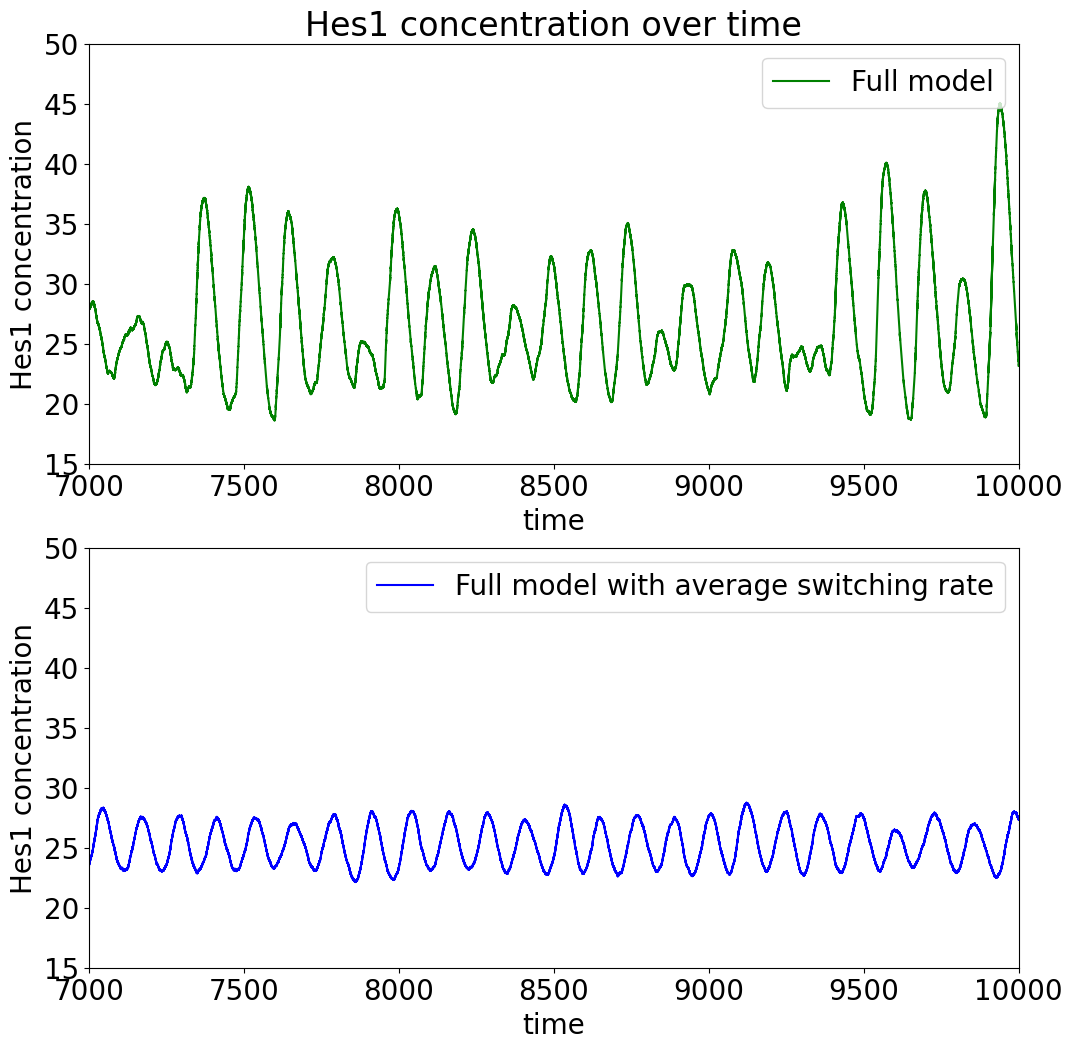

In [14]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(lambda_s=val_lambda,        
                                                      P_0=P_0,
                                                      h=h,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)

time_trajmns,mRNA_trajmns,Hes1_trajmns = master.one_trajectory_noSwitchNoise(P_0=P_0,
                                                      h=h,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)    
    
    
fig,ax=plt.subplots(2,1, figsize=(12,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(15,50)
ax[0].set_xlim(7000,10000)
    
linem, = ax[0].plot(time_trajm,Hes1_trajm, color = 'green')
    
ax[0].legend([linem], ['Full model'],loc='upper right')


ax[1].set_xlabel('time') 
ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(15,50)
ax[1].set_xlim(7000,10000)

linemns, = ax[1].plot(time_trajmns,Hes1_trajmns, color = 'blue')

ax[1].legend([linemns], ['Full model with average switching rate'], loc='upper right')

plt.savefig(read_directory+'\\plots\\trajP - comparison full with vs without switching- lambda=1 & Omega=1000 & tau=19.7 .pdf')
    
plt.show()

In [ ]:
fig,ax=plt.subplots(2,1, figsize=(12,12))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(0,10)
ax[0].set_xlim(7000,10000)
    
linem, = ax[0].plot(time_trajm,mRNA_trajm, color = 'green')
    
ax[0].legend([linem], ['Full model'],loc='upper right')


ax[1].set_xlabel('time') 
ax[1].set_ylabel('Hes1 concentration')

ax[1].set_ylim(0,10)
ax[1].set_xlim(7000,10000)

linemns, = ax[1].plot(time_trajmns,mRNA_trajmns, color = 'blue')

ax[1].legend([linemns], ['Full model with average switching rate'], loc='upper right')
    
plt.show()

# Comparison Langevin VS full model

## Time series

In [18]:
alpha_m=1
alpha_p=1
mu_m=0.03
mu_p=0.03
h=4.1
P_0=10

T=10000
delta_t=1

n_t=int(T/delta_t)

val_lambda=100
val_Omega=100
val_tau=19.7

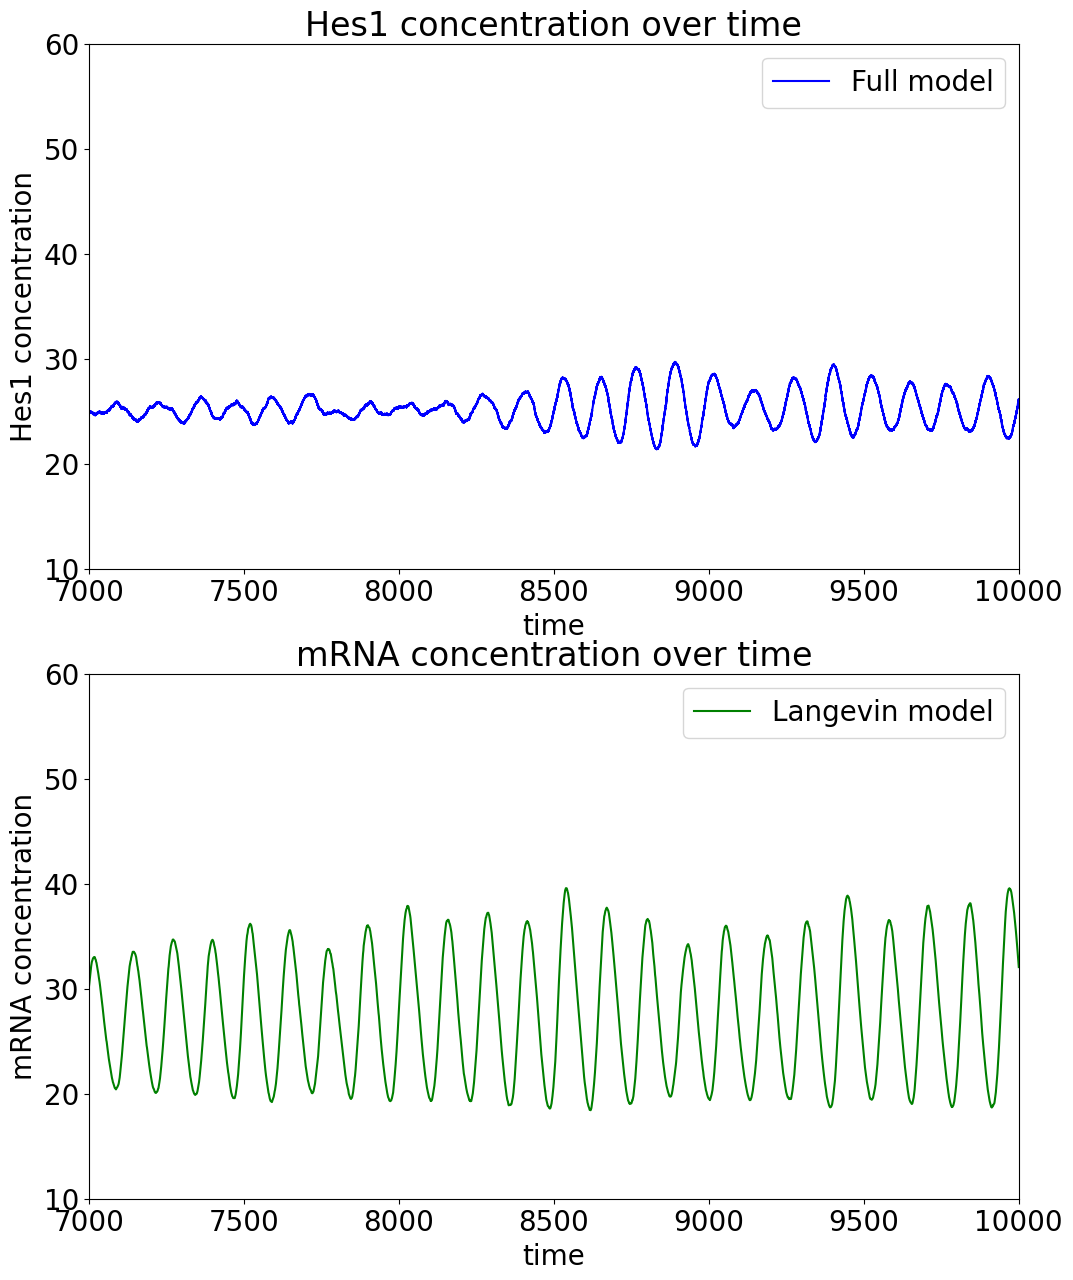

In [23]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(lambda_s=val_lambda,        
                                                      P_0=P_0,
                                                      h=h,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=val_Omega)
        
time_trajl,mRNA_trajl,Hes1_trajl = langevin.one_trajectory(lambda_s=val_lambda,        
                                                      P_0=P_0,
                                                      h=h,
                                                      tau=val_tau,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=1,
                                                      Omega=val_Omega)    

    
fig,ax=plt.subplots(2,1,figsize=(12,15))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(10,60)
ax[0].set_xlim(7000,10000)
    
linem,=ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
ax[0].legend([linem], ['Full model'])
    
    
ax[1].set_title('mRNA concentration over time') 
ax[1].set_xlabel('time') 
ax[1].set_ylabel('mRNA concentration')

ax[1].set_ylim(10,60)
ax[1].set_xlim(7000,10000)
    
linel,=ax[1].plot(time_trajl,Hes1_trajl, color = 'green')
ax[1].legend([linel], ['Langevin model'])

plt.savefig(read_directory+'\\plots\\trajP - comparison Full vs Langevin - lambda=1 & Omega=1000 & tau=19.7 .pdf')
plt.show()

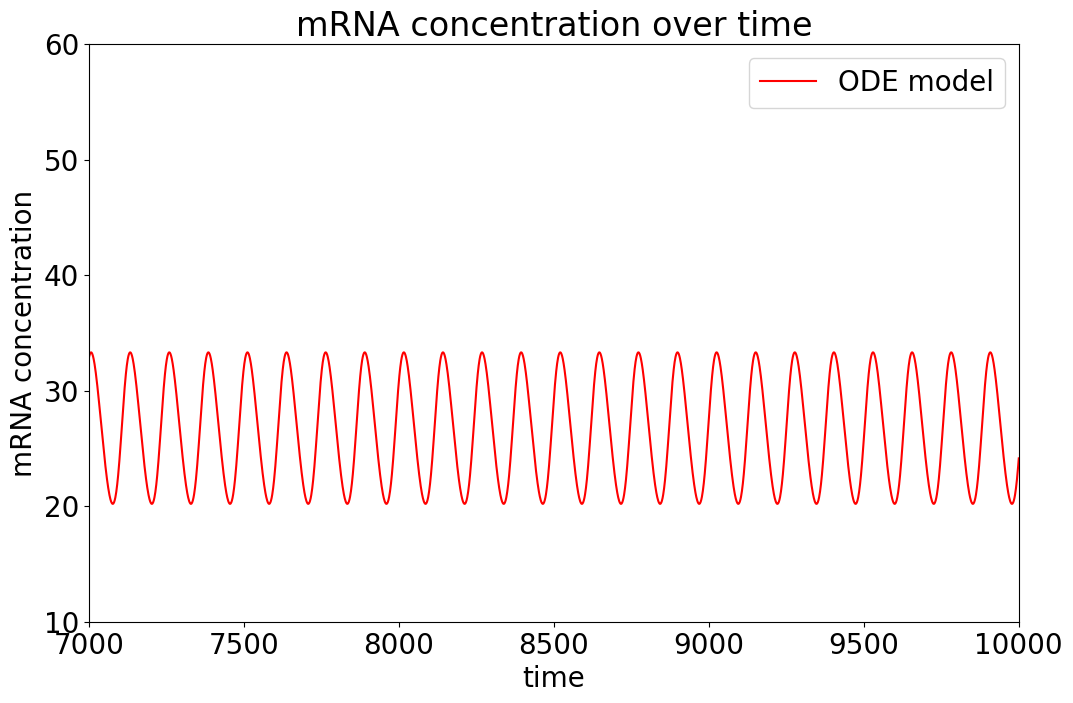

In [8]:
time_trajODE,mRNA_trajODE,Hes1_trajODE = langevin.resolve_ODE(P_0=10,
                                                      h=h,
                                                      tau=19.7,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=1)
    
fig,ax=plt.subplots(1,1,figsize=(12,7.5))
    
    
ax.set_title('mRNA concentration over time') 
ax.set_xlabel('time') 
ax.set_ylabel('mRNA concentration')

ax.set_ylim(10,60)
ax.set_xlim(7000,10000)
    
linel,=ax.plot(time_trajODE,Hes1_trajODE, color = 'red')
ax.legend([linel], ['ODE model'])

plt.show()

In [ ]:
km=0
while time_trajm[km]<T/2:
    km+=1
    
std_Mm = np.std(mRNA_trajm[km:])
std_Pm = np.std(Hes1_trajm[km:])

std_Ml = np.std(mRNA_trajl[T//2:])
std_Pl = np.std(Hes1_trajl[T//2:])

mean_Mm = np.mean(mRNA_trajm[km:])
mean_Pm = np.mean(Hes1_trajm[km:])

In [ ]:
print(abs(std_Mm-std_Ml)/mean_Mm)
print(abs(std_Pm-std_Pl)/mean_Pm)

## STD plots & power spectra

### Pre computation

In [ ]:
val_lambda=[0.01,0.1,1,10,100]
val_Omega=[1,10,100]
val_tau=[19.7]
n_lambda=np.size(val_lambda)
n_Omega=np.size(val_Omega)
n_tau=np.size(val_tau)

In [ ]:
std_Mm=np.zeros((n_lambda,n_Omega,n_tau))
std_Ml=np.zeros((n_lambda,n_Omega,n_tau))

std_Pm=np.zeros((n_lambda,n_Omega,n_tau))
std_Pl=np.zeros((n_lambda,n_Omega,n_tau))

mean_Mm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Ml=np.zeros((n_lambda,n_Omega,n_tau))

mean_Pm=np.zeros((n_lambda,n_Omega,n_tau))
mean_Pl=np.zeros((n_lambda,n_Omega,n_tau))

power_spectrum_Mm=np.zeros((n_t//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Ml=np.zeros((n_t//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)

power_spectrum_Pm=np.zeros((n_t//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)
power_spectrum_Pl=np.zeros((n_t//2,n_lambda,n_Omega,n_tau),dtype=np.ndarray)

In [ ]:
for i in range(n_lambda):
    for j in range(n_Omega):
        for k in range(n_tau):
            
            print("lambda=",val_lambda[i])
            print("Omega=",val_Omega[j])
            print("tau=",val_tau[k])
            
            output=utils.compute_fourier_transform_mean_and_std(n_iter=1000,lambda_s=val_lambda[i],        
                                                      P_0=P_0,
                                                      h=h,
                                                      tau=val_tau[k],
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=delta_t,
                                                      Omega=val_Omega[j])            
            
            t_ref=output["times"]
            freq_ref=output["frequencies"]
            
            std_Mm[i,j,k]=output["std Mm"]
            std_Ml[i,j,k]=output["std Ml"]

            std_Pm[i,j,k]=output["std Pm"]
            std_Pl[i,j,k]=output["std Pl"]

            mean_Mm[i,j,k]=output["mean Mm"]
            mean_Ml[i,j,k]=output["mean Ml"]

            mean_Pm[i,j,k]=output["mean Pm"]
            mean_Pl[i,j,k]=output["mean Pl"]

            power_spectrum_Mm[:,i,j,k]=output["power spectrum Mm"]
            power_spectrum_Ml[:,i,j,k]=output["power spectrum Ml"]
            
            power_spectrum_Pm[:,i,j,k]=output["power spectrum Pm"]
            power_spectrum_Pl[:,i,j,k]=output["power spectrum Pl"]

            print("Done")
            print("\n")
        

In [ ]:
pd.DataFrame(t_ref,columns=['value']).to_csv(read_directory+'\\data\\times.csv')
pd.DataFrame(freq_ref,columns=['value']).to_csv(read_directory+'\\data\\freq.csv')

pd.DataFrame(std_Mm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\std_Mm.csv')
pd.DataFrame(std_Ml.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\std_Ml.csv')
pd.DataFrame(std_Pm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\std_Pm.csv')
pd.DataFrame(std_Pl.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\std_Pl.csv')

pd.DataFrame(mean_Mm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\mean_Mm.csv')
pd.DataFrame(mean_Ml.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\mean_Ml.csv')
pd.DataFrame(mean_Pm.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\mean_Pm.csv')
pd.DataFrame(mean_Pl.reshape((n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\mean_Pl.csv')

pd.DataFrame(power_spectrum_Mm.reshape((n_t//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\power_spectrum_Mm.csv')
pd.DataFrame(power_spectrum_Ml.reshape((n_t//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\power_spectrum_Ml.csv')
pd.DataFrame(power_spectrum_Pm.reshape((n_t//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\power_spectrum_Pm.csv')
pd.DataFrame(power_spectrum_Pl.reshape((n_t//2*n_lambda*n_Omega*n_tau)),columns=['value']).to_csv(read_directory+'\\data\\power_spectrum_Pl.csv')

### STD plots (against lambda)

In [ ]:
read_directory = os.getcwd() + '\\paper plots'

In [ ]:
t_ref=pd.read_csv(read_directory+'\\data\\times.csv')['value'].values
freq_ref=pd.read_csv(read_directory+'\\data\\freq.csv')['value'].values

std_Mm=pd.read_csv(read_directory+'\\data\\std_Mm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Ml=pd.read_csv(read_directory+'\\data\\std_Ml.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Pm=pd.read_csv(read_directory+'\\data\\std_Pm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
std_Pl=pd.read_csv(read_directory+'\\data\\std_Pl.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))

mean_Mm=pd.read_csv(read_directory+'\\data\\mean_Mm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Ml=pd.read_csv(read_directory+'\\data\\mean_Ml.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Pm=pd.read_csv(read_directory+'\\data\\mean_Pm.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))
mean_Pl=pd.read_csv(read_directory+'\\data\\mean_Pl.csv')['value'].values.reshape((n_lambda,n_Omega,n_tau))

power_spectrum_Mm=pd.read_csv(read_directory+'\\data\\power_spectrum_Mm.csv')['value'].values.reshape((n_t//2,n_lambda,n_Omega,n_tau))
power_spectrum_Ml=pd.read_csv(read_directory+'\\data\\power_spectrum_Ml.csv')['value'].values.reshape((n_t//2,n_lambda,n_Omega,n_tau))
power_spectrum_Pm=pd.read_csv(read_directory+'\\data\\power_spectrum_Pm.csv')['value'].values.reshape((n_t//2,n_lambda,n_Omega,n_tau))
power_spectrum_Pl=pd.read_csv(read_directory+'\\data\\power_spectrum_Pl.csv')['value'].values.reshape((n_t//2,n_lambda,n_Omega,n_tau))

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,10)) 

ax1.set_title('Hes1 concentration STD against lambda') 
ax1.set_xlabel('lambda') 
ax1.set_ylabel('Concentration STD')
        
linem,=ax1.plot(val_lambda, std_Pm[:,-1,0], color = 'blue') 
linel,=ax1.plot(val_lambda, std_Pl[:,-1,0], color = 'green')

ax1.set_ylim(0,120)
ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.legend([linem, linel], ['Full model', 'Langevin model'])

plt.savefig(read_directory +'\\plots\\plot_std_P - Omega = 1000 & tau = 19.7 .pdf')  

plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,10)) 

ax1.set_title('Hes1 concentration STD error against lambda') 
ax1.set_xlabel('lambda') 
ax1.set_ylabel('Concentration STD error')

error = abs(std_Pm[:,-1,0] - std_Pl[:,-1,0])
linec,=ax1.plot(val_lambda, error, color = 'red') 
    
ax1.set_ylim(0,80)
ax1.tick_params(axis ='y')
ax1.set_xscale('log')
ax1.legend([linec], ['full model', 'Langevin model'])

plt.savefig(read_directory +'\\plots\\plot_error_std_P - Omega = 1000 & tau = 19.7 .pdf')  

plt.show()

In [ ]:
error

### STD plots (against Omega and lambda)

In [ ]:
levels=np.array([2,5]+[10*k for k in range(1,7)])

fig, ax1 = plt.subplots(figsize=(12,10)) 
ax1.set_title('Hes1 concentration STD error level curves') 
ax1.set_xlabel('1/Omega') 
ax1.set_ylabel('1/lambda') 

inv_val_Omega=[1/x for x in val_Omega]
inv_val_lambda = [1/x for x in val_lambda]

contours1=ax1.contour(inv_val_Omega, inv_val_lambda, abs(std_Pm[:,:,0] - std_Pl[:,:,0]), cmap = 'copper', levels=levels)

ax1.tick_params(axis ='y') 
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.clabel(contours1,inline=1, fontsize=10)

plt.savefig(read_directory +'\\plots\\plot_level_curve_std_Pm_vs_Pl - tau=19.7 .pdf')
plt.show()

### Power spectra

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,10)) 

ax1.set_title('Hes1 Power spectrum') 
ax1.set_xlabel('Frequency') 
ax1.set_ylabel('Power') 

i_lambda = 4

freq_th,Sm,Sp=utils.lna_power_spectrum(h=h,lambda_s=val_lambda[i_lambda],P_0=10,tau=val_tau[-1],Omega=val_Omega[-1],T=T/2,delta_t=1)

linem,=ax1.plot(freq_ref[1:200], power_spectrum_Pm[1:200,i_lambda,-1,0]/n_t, color = 'blue') 
linel,=ax1.plot(freq_ref[1:200], power_spectrum_Pl[1:200,i_lambda,-1,0]/n_t, color = 'green')
linet,=ax1.plot(freq_th[1:200], Sp[1:200], color = 'red')    
            
ax1.tick_params(axis ='y') 
ax1.set_yscale('log')        
ax1.legend([linem, linel, linet], ['Full model', 'Langevin model', 'LNA model'])

#ax1.set_xlim(0, 0.4)
            
plt.savefig(read_directory + '\\plots\\plot_power_spectrum_P - lambda = 1 & Omega = 1000 & tau = 19.7 .pdf')  

plt.show()

In [8]:
pool_Mm,pool_Pm=master.pool_values(n_iter=50,tau=19.7,lambda_s=1000,P_0=10,Omega=10,T=T)
pool_Ml,pool_Pl=langevin.pool_values(n_iter=50,tau=19.7,lambda_s=1000,P_0=10,Omega=10,T=T)

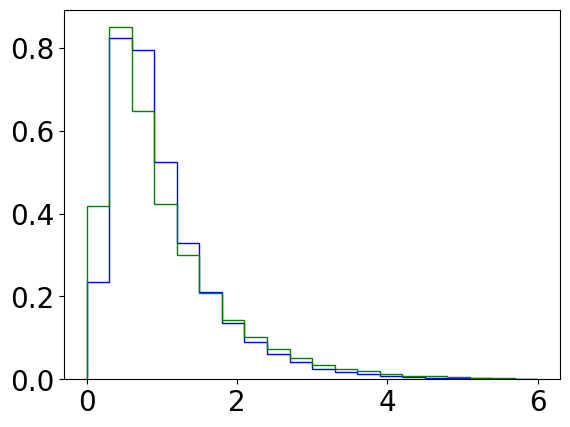

In [22]:
hist_Mm=plt.hist(pool_Mm,bins=20,range=(0,6),histtype='step',density=True,color='blue')
hist_Ml=plt.hist(pool_Ml,bins=20,range=(0,6),histtype='step',density=True,color='green')

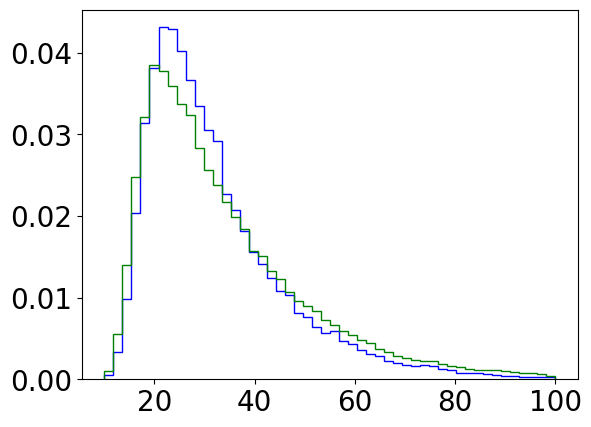

In [19]:
hist_Pm=plt.hist(pool_Pm,bins=50,range=(10,100),histtype='step',density=True,color='blue')
hist_Pl=plt.hist(pool_Pl,bins=50,range=(10,100),histtype='step',density=True,color='green')

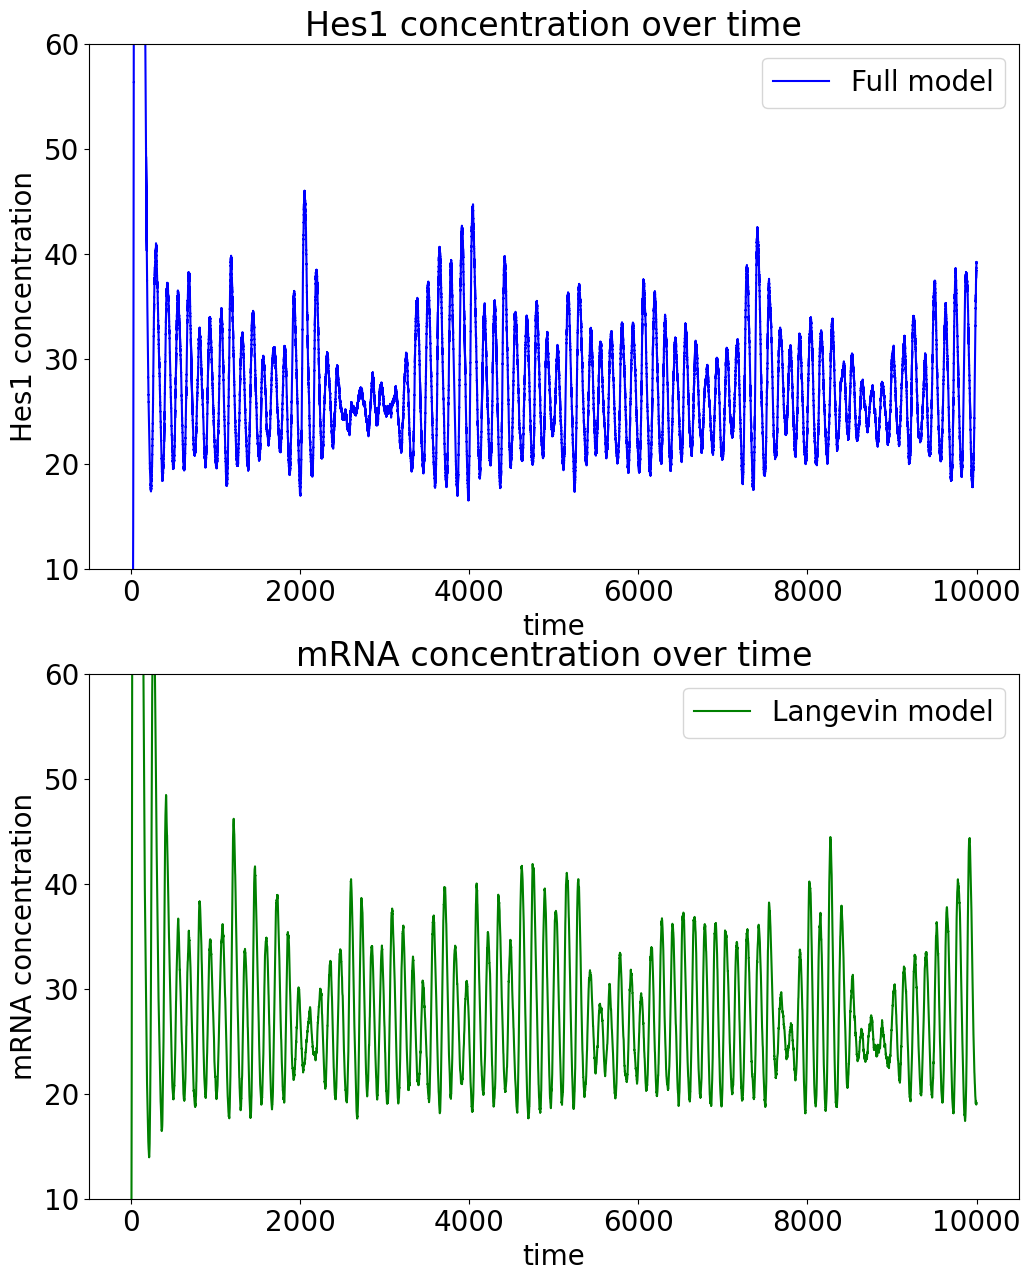

In [5]:
time_trajm,mRNA_trajm,Hes1_trajm = master.one_trajectory(lambda_s=100,        
                                                      P_0=P_0,
                                                      h=h,
                                                      tau=19.7,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      Omega=100)
        
time_trajl,mRNA_trajl,Hes1_trajl = langevin.one_trajectory(lambda_s=100,        
                                                      P_0=P_0,
                                                      h=h,
                                                      tau=19.7,
                                                      P_init=0,
                                                      M_init=0,
                                                      T=T,
                                                      delta_t=1,
                                                      Omega=100)    

    
fig,ax=plt.subplots(2,1,figsize=(12,15))
    
ax[0].set_title('Hes1 concentration over time') 
ax[0].set_xlabel('time') 
ax[0].set_ylabel('Hes1 concentration') 

ax[0].set_ylim(10,60)
#ax[0].set_xlim(7000,10000)
    
linem,=ax[0].plot(time_trajm,Hes1_trajm, color = 'blue')
ax[0].legend([linem], ['Full model'])
    
    
ax[1].set_title('mRNA concentration over time') 
ax[1].set_xlabel('time') 
ax[1].set_ylabel('mRNA concentration')

ax[1].set_ylim(10,60)
#ax[1].set_xlim(7000,10000)
    
linel,=ax[1].plot(time_trajl,Hes1_trajl, color = 'green')
ax[1].legend([linel], ['Langevin model'])

plt.show()